<span style="font-size:36px">Spark Starter</span><br> <span style="font-size:26px"> *Working with Apache Spark using pyspark*</span><br><hr>
<span style="font-size:18px;color:#A43562">
Important Links:
* [Apache Spark Official Documentation](https://spark.apache.org/docs/latest/index.html)
* [Spark Components - Cluster Overview](https://spark.apache.org/docs/latest/cluster-overview.html)
* [RDD Programming Guide](https://spark.apache.org/docs/latest/rdd-programming-guide.html)
* [SQL Programming Guide](https://spark.apache.org/docs/latest/sql-programming-guide.html)
* [pyspark ~ Python API](https://spark.apache.org/docs/latest/api/python/getting_started/index.html)
    * [DataFrame Creation](https://spark.apache.org/docs/latest/api/python/getting_started/quickstart.html#DataFrame-Creation)
    * [Working with SQL](https://spark.apache.org/docs/latest/api/python/getting_started/quickstart.html#Working-with-SQL)
    * [SQL Core Classes](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html)
* [Official Example Code](https://spark.apache.org/examples.html)
</span><hr>

<span style="font-size:14px;color:#4500FF">
Install spark on your server

<code> sudo apt install spark </code>

*spark can be accessed from command line using the spark-shell command (here the shell acts as a driver program)*

<code> spark-shell -c spark.driver.bindAddress=127.0.0.1 </code>


Install the pyspark package using pip

<code> pip install pyspark </code>
</span>
<hr>


# ~ pyspark

<span style="font-size:18px;font-family:Corbel;color:#003300">

*make sure both spark & pyspark have installed correctly on the system*
</span>

In [1]:
pip show pyspark

Name: pyspark
Version: 3.1.2
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /home/iitp/anaconda3/lib/python3.8/site-packages
Requires: py4j
Required-by: 
Note: you may need to restart the kernel to use updated packages.


# ~ Imports

In [2]:
import pyspark, random, os, shutil, datetime
import matplotlib.pyplot as plt
import numpy as np

# ~ Spark *session* & *context*

<span style="font-size:18px;font-family:Corbel;color:#003300">

Spark session is a **unified entry point** of a spark application from Spark 2.0. It provides a way to interact with various spark's functionality with a lesser number of constructs. Instead of having a spark context, hive context, SQL context, now all of it is encapsulated in a Spark session.

* SparkContext: Refer [Official Documentation](https://spark.apache.org/docs/latest/cluster-overview.html)
* [Glossary](https://spark.apache.org/docs/latest/cluster-overview.html#glossary) of Cluster Components

NOTE: *Multiple sessions may share the same context, it provides isolation for users working in the same cluster.*
    
</span>

## Create a *Session*

In [3]:
start_time = datetime.datetime.now() # record the start time

# earlier ... 
"""
from pyspark import SparkContext, SparkConf
sc = SparkContext(conf=SparkConf().setAppName('CS555').setMaster("local"))
"""

# using a spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('CS555').getOrCreate()  # to stop session use spark.stop()
spark

## Get *context* object

In [4]:
sc = spark.sparkContext
print('sparkContext:',sc)

sparkContext: <SparkContext master=local[*] appName=CS555>


# ~ RDD - Resilient Distributed Datasets

<span style="font-size:18px;font-family:Corbel;color:#003300">

Refer the official [RDD Programming guide](https://spark.apache.org/docs/latest/rdd-programming-guide.html)

* **[RDDs](https://spark.apache.org/docs/latest/rdd-programming-guide.html#resilient-distributed-datasets-rdds)** are **immutable** collection of datasets that work in parallel
 
* **[Transformations](https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations)** are lazy operations on RDDs - stores operations (in a DAG) rather than actual transformation
* **[Actions](https://spark.apache.org/docs/latest/rdd-programming-guide.html#actions)** on RDDs produce results (using the operations stored in DAG)

</span>

## Creating RDDs

<span style="font-size:20px;color:#A43562">Using *sc.parallelize()*</span>

### Example [A]

<span style="font-size:16px;color:#DA4512">~ create RDDs</span>

In [5]:
RDD_array1 = sc.parallelize(np.random.randint(0,10,size=10),numSlices=5)
RDD_array2 = sc.parallelize(np.random.randint(0,10,size=10),numSlices=3)
print(type(RDD_array1),RDD_array1)
print(type(RDD_array2),RDD_array2)

<class 'pyspark.rdd.RDD'> ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274
<class 'pyspark.rdd.RDD'> ParallelCollectionRDD[1] at readRDDFromFile at PythonRDD.scala:274


<span style="font-size:16px;color:#DA4512">~ collect values</span>

In [6]:
a1 = RDD_array1.collect() # 'collect' is an action
a2 = RDD_array2.collect()
print(type(a1), len(a1),  a1)
print(type(a2), len(a2), a2)

<class 'list'> 10 [2, 7, 3, 2, 5, 1, 7, 1, 5, 9]
<class 'list'> 10 [8, 7, 4, 1, 1, 2, 6, 2, 7, 5]


<span style="font-size:16px;color:#DA4512">~ collect glom values ( .. see [glom function](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.glom.html))</span>

In [7]:
g1 = RDD_array1.glom().collect()
g2 = RDD_array2.glom().collect()
print(type(g1), len(g1),  g1)
print(type(g2), len(g2), g2)

<class 'list'> 5 [[2, 7], [3, 2], [5, 1], [7, 1], [5, 9]]
<class 'list'> 3 [[8, 7, 4], [1, 1, 2], [6, 2, 7, 5]]


<span style="font-size:16px;color:#DA4512">~ transformation **map(x)**</span>

In [8]:
RDD_array3 = RDD_array2.map(lambda x: x*2) # 'map' is a transformation
print(type(RDD_array3),RDD_array3)
a3 = RDD_array3.collect()
print(type(a3),  a3)

<class 'pyspark.rdd.PipelinedRDD'> PythonRDD[4] at RDD at PythonRDD.scala:53
<class 'list'> [16, 14, 8, 2, 2, 4, 12, 4, 14, 10]


<span style="font-size:16px;color:#DA4512">~ transformation **union(x)**</span>

In [9]:
RDD_array4 = RDD_array1.union(RDD_array2) # 'union' is a transformation
print(type(RDD_array4),RDD_array4)
a4 = RDD_array4.collect()
print(type(a4),  a4, 'Sum:',sum(a4))

<class 'pyspark.rdd.RDD'> UnionRDD[7] at union at NativeMethodAccessorImpl.java:0
<class 'list'> [2, 7, 3, 2, 5, 1, 7, 1, 5, 9, 8, 7, 4, 1, 1, 2, 6, 2, 7, 5] Sum: 85


<span style="font-size:16px;color:#DA4512">~ action **reduce(x,y)**</span>

In [10]:
a5 = RDD_array4.reduce(lambda x,y: x+y)  # 'reduce' is an action
print(type(a5), 'Sum:', a5)

<class 'numpy.int64'> Sum: 85


### Example [B]

<span style="font-size:16px;color:#DA4512">~ create RDDs</span>

In [11]:
RDD_Names = sc.parallelize(['Alice', 'Bob', 'Charlie', 'David', 'Eli', 
                            'Felix', 'George', 'Hank', 'John', 'Isabel'])
print(type(RDD_Names),RDD_Names)

<class 'pyspark.rdd.RDD'> ParallelCollectionRDD[9] at readRDDFromFile at PythonRDD.scala:274


<span style="font-size:16px;color:#DA4512">~ transformation **filter(x)**</span>

In [12]:
RDD_Info = RDD_Names.filter(lambda x: len(x)<=4)
print(type(RDD_Info),RDD_Info)
info = RDD_Info.collect()
print(info)

<class 'pyspark.rdd.PipelinedRDD'> PythonRDD[10] at RDD at PythonRDD.scala:53
['Bob', 'Eli', 'Hank', 'John']


<span style="font-size:16px;color:#DA4512">~ map(x) and reduce(x,y)</span>

In [13]:
RDD_counts = RDD_Info.map(lambda x: len(x))
counts = RDD_counts.collect()
print('counts',counts)
summation = RDD_counts.reduce(lambda x,y: x+y)
print(summation)

counts [3, 3, 4, 4]
14


<span style="font-size:16px;color:#DA4512">~ One liner</span>

In [14]:
one_liner = RDD_Names.filter(lambda x: len(x)<=4).map(lambda x: len(x)).reduce(lambda x,y: x+y)
print(one_liner)

14


## Creating RDDs

<span style="font-size:20px;color:#A43562">from *external files/objects*</span>

<span style="font-size:16px;color:#DA4512">~ Obtain data from yahoo finance ( .. See [Ticker Symbols](https://finance.yahoo.com/lookup/))</span>

In [15]:
import pandas_datareader
pdr=pandas_datareader.data.DataReader('googl', 'yahoo', 
                start=datetime.datetime(2010, 8, 1), 
                end=datetime.datetime(2016, 11, 30)).to_csv('stocks.csv', sep=',') 
print('stocks.csv' in os.listdir("./"))

True


<span style="font-size:16px;color:#DA4512">~ Create RDD from CSV</span>

In [16]:
RDD_F = sc.textFile("stocks.csv")

cf = RDD_F.count() # 'count' is an action
print('Count:',cf)

data = RDD_F.collect() # 'collect' is an action
print(type(data), len(data), '\n[-]', data[-1])

first = RDD_F.first() # 'first' is an action
print('[H]',first) #<---- shall be used for schema

Count: 1597
<class 'list'> 1597 
[-] 2016-11-30,791.510009765625,773.1500244140625,789.0999755859375,775.8800048828125,2279100.0,775.8800048828125
[H] Date,High,Low,Open,Close,Volume,Adj Close


<span style="font-size:16px;color:#DA4512">~ function for parsing</span> ( .. see [Data-Types](https://spark.apache.org/docs/latest/sql-ref-datatypes.html))

In [17]:
def parse(xs):
    """ parses each row of data and converts to appropiate data type"""
    global first
    if xs!=first:
        x = xs.split(",")
        return [datetime.datetime.strptime(x[0],"%Y-%m-%d"), 
                float(x[1]), float(x[2]), float(x[3]), float(x[4]), float(x[5]), float(x[6])]
    else:
        return None 

<span style="font-size:16px;color:#DA4512">~ create a **DataFrame**</span> ( .. see [sql.DataFrame](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.html))

In [18]:
dframe = RDD_F.map(parse).filter(lambda x: x!=None).toDF(first.split(','))
print(type(dframe), dframe.count())

<class 'pyspark.sql.dataframe.DataFrame'> 1596


<span style="font-size:16px;color:#DA4512">~ Schema</span>

In [19]:
dframe.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Adj Close: double (nullable = true)



<span style="font-size:16px;color:#DA4512">~ Data</span>

In [20]:
dframe.show() # or use .describe()

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|               Date|              High|               Low|              Open|             Close|   Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-08-02 00:00:00| 246.8868865966797|243.71371459960938|   244.73974609375|245.45045471191406|3713683.0|245.45045471191406|
|2010-08-03 00:00:00|246.47647094726562|243.62362670898438|245.49549865722656|      245.16015625|3600995.0|      245.16015625|
|2010-08-04 00:00:00|253.75375366210938|245.77076721191406|246.33633422851562| 253.4134063720703|7617375.0| 253.4134063720703|
|2010-08-05 00:00:00|254.55455017089844| 252.0320281982422| 253.1981964111328|254.30430603027344|4835959.0|254.30430603027344|
|2010-08-06 00:00:00| 253.1231231689453| 248.2732696533203| 252.9529571533203|250.36036682128906|6632361.0|250.

<span style="font-size:16px;color:#DA4512">~ Description</span>

In [21]:
dframe.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              High|               Low|              Open|             Close|            Volume|         Adj Close|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|              1596|              1596|              1596|              1596|              1596|              1596|
|   mean|485.22888260078906|477.06231170310116|481.39391910103626|481.21028618107465| 3864040.488095238|481.21028618107465|
| stddev| 176.8806721737977| 173.9654572315556|175.60862773625627|175.43533974166664|2724199.6578315045|175.43533974166664|
|    min|227.66265869140625|224.04904174804688| 225.2252197265625| 225.2352294921875|          520600.0| 225.2352294921875|
|    max|             839.0| 829.0399780273438|             838.5|  835.739990234375|        2.961995E7|  835.739990234375|
+-------

<span style="font-size:16px;color:#DA4512">~ Plot Data</span>

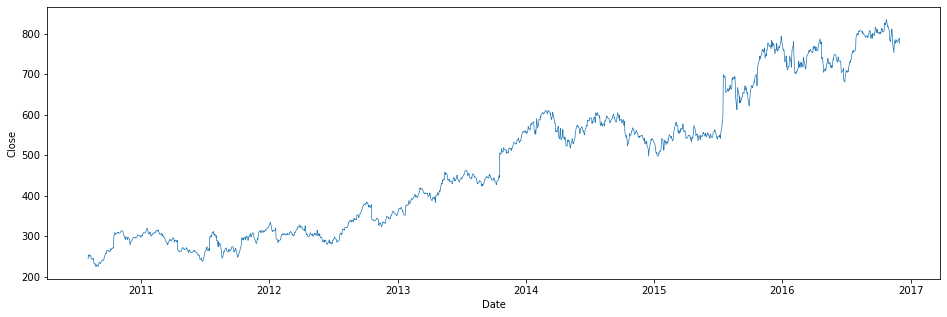

In [22]:
d = dframe.select(['Date', 'Close']).sort('Date')
dx = d.select(['Date']).collect()
dy = d.select(['Close']).collect()
plt.figure(figsize=(16,5))
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(dx, dy, linewidth=0.7)
plt.show()

<span style="font-size:16px;color:#DA4512">~ Plot Recent Data</span>

Samples: 987


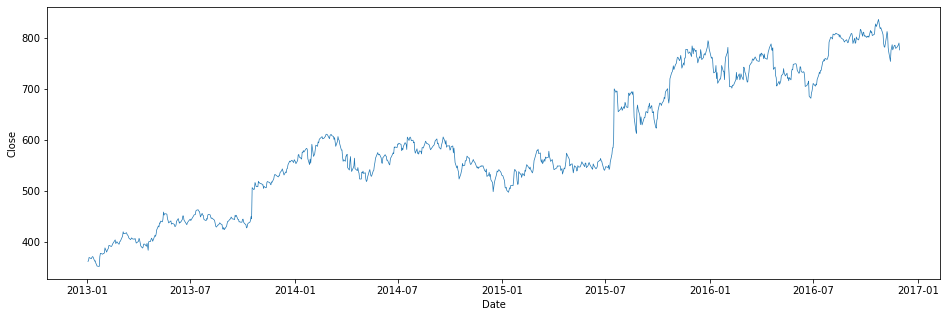

In [23]:
df = dframe.filter(
            dframe.Date > datetime.datetime.strptime('2013-1-1', "%Y-%m-%d")
                    ).select(['Date', 'Close']).sort('Date')
dx = df.select(['Date']).collect()
dy = df.select(['Close']).collect()
print('Samples:',len(dx))
plt.figure(figsize=(16,5))
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(dx, dy, linewidth=0.7)
plt.show()

<span style="font-size:16px;color:#DA4512">~ SQL Queries ( .. see [SQL-Guide](https://spark.apache.org/docs/2.2.0/sql-programming-guide.html))</span>

In [24]:
# Register the DataFrame as a SQL temporary view
df.createOrReplaceTempView("stock")
# Write and execute an SQL statement
sqlDF = spark.sql("SELECT * FROM stock")
sqlDF.show()

+-------------------+------------------+
|               Date|             Close|
+-------------------+------------------+
|2013-01-02 00:00:00|361.98699951171875|
|2013-01-03 00:00:00|362.19720458984375|
|2013-01-04 00:00:00| 369.3543395996094|
|2013-01-07 00:00:00|367.74273681640625|
|2013-01-08 00:00:00|367.01702880859375|
|2013-01-09 00:00:00|  369.429443359375|
|2013-01-10 00:00:00| 371.1111145019531|
|2013-01-11 00:00:00| 370.3653564453125|
|2013-01-14 00:00:00|361.98699951171875|
|2013-01-15 00:00:00|362.82781982421875|
|2013-01-16 00:00:00|357.95294189453125|
|2013-01-17 00:00:00| 356.0160217285156|
|2013-01-18 00:00:00|352.60760498046875|
|2013-01-22 00:00:00| 351.7867736816406|
|2013-01-23 00:00:00| 371.1211242675781|
|2013-01-24 00:00:00|377.48248291015625|
|2013-01-25 00:00:00|377.21221923828125|
|2013-01-28 00:00:00| 375.7407531738281|
|2013-01-29 00:00:00|377.21722412109375|
|2013-01-30 00:00:00|377.29229736328125|
+-------------------+------------------+
only showing top

<span style="font-size:16px;color:#DA4512">~ SQL Queries using SQLContext( .. see [SQL-Guide](https://spark.apache.org/docs/2.2.0/sql-programming-guide.html))</span>

In [25]:
# Load a text file and convert each line to a dictionary.
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
sqlContext.sql("SELECT * FROM stock").show()

+-------------------+------------------+
|               Date|             Close|
+-------------------+------------------+
|2013-01-02 00:00:00|361.98699951171875|
|2013-01-03 00:00:00|362.19720458984375|
|2013-01-04 00:00:00| 369.3543395996094|
|2013-01-07 00:00:00|367.74273681640625|
|2013-01-08 00:00:00|367.01702880859375|
|2013-01-09 00:00:00|  369.429443359375|
|2013-01-10 00:00:00| 371.1111145019531|
|2013-01-11 00:00:00| 370.3653564453125|
|2013-01-14 00:00:00|361.98699951171875|
|2013-01-15 00:00:00|362.82781982421875|
|2013-01-16 00:00:00|357.95294189453125|
|2013-01-17 00:00:00| 356.0160217285156|
|2013-01-18 00:00:00|352.60760498046875|
|2013-01-22 00:00:00| 351.7867736816406|
|2013-01-23 00:00:00| 371.1211242675781|
|2013-01-24 00:00:00|377.48248291015625|
|2013-01-25 00:00:00|377.21221923828125|
|2013-01-28 00:00:00| 375.7407531738281|
|2013-01-29 00:00:00|377.21722412109375|
|2013-01-30 00:00:00|377.29229736328125|
+-------------------+------------------+
only showing top

<span style="font-size:16px;color:#DA4512">~ Check Catalog</span>

In [26]:
db = spark.catalog.listDatabases()
tb = spark.catalog.listTables()
print('Databases:', db)
print('Tables:',tb)

Databases: [Database(name='default', description='default database', locationUri='file:/home/iitp/alpha/sparker/spark-warehouse')]
Tables: [Table(name='stock', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]


# ~ Price Forecasting

*Not using spark.mllib*

## Using LSTM Model

<span style="font-size:16px;color:#DA4512">~ Prepare</span>

Number of rows and columns: (987, 2)
Split-Dataset: 987 Train: 789 Test: 198
Time-Steps: 20
Final shape: (769, 20, 1) (769,)


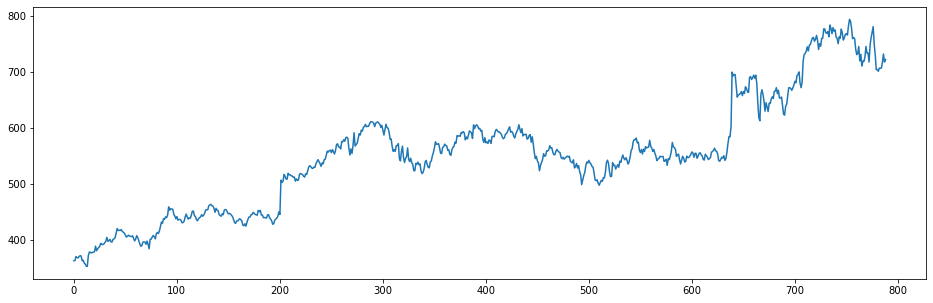

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense, RepeatVector, TimeDistributed, Flatten, LSTM
from tensorflow.keras import Model
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# convert to Pandas Data frame 
dfx = df.toPandas()
N = len(dfx)
tr = int(N*0.80) #<- train-test split ration
timesteps = 20
print('Number of rows and columns:', dfx.shape)
print('Split-Dataset:',N,'Train:',tr,'Test:',N-tr)
print('Time-Steps:',timesteps)

# prepare data
training_set = dfx.iloc[:tr, 1:2].values
test_set = dfx.iloc[tr:, 1:2].values
plt.figure(figsize=(16,5))
plt.plot(training_set)

# Feature Scaling
scal = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scal.fit_transform(training_set)

# Creating a data structure with time-steps and 1 output
X_train = []
y_train = []
for i in range(timesteps, tr):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Final shape:',X_train.shape,y_train.shape)

<span style="font-size:16px;color:#DA4512">~ Build LSTM</span>

In [28]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(model.summary())
cb_ES_loss = tf.keras.callbacks.EarlyStopping(
        monitor='loss',  #monitor: Quantity to be monitored.
        min_delta=0.001,  #min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
        patience=25,  #patience: Number of epochs with no improvement after which training will be stopped.
        verbose=1,  #verbose: verbosity mode.
        mode='auto',  #mode: One of {"auto", "min", "max"}. 
                      #In min mode, training will stop when the quantity monitored has stopped decreasing; 
                      #in "max" mode it will stop when the quantity monitored has stopped increasing; 
                      #in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
        baseline=None,  #baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
        restore_best_weights=True #restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.
        )
cb_list = [cb_ES_loss]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 20, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

<span style="font-size:16px;color:#DA4512">~ Training</span>

Epoch 1/100
25/25 [==============================] - 7s 31ms/step - loss: 0.0441
Epoch 2/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0082
Epoch 3/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0061
Epoch 4/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0058
Epoch 5/100
25/25 [==============================] - 1s 33ms/step - loss: 0.0066
Epoch 6/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0075
Epoch 7/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0058
Epoch 8/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0056
Epoch 9/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0052
Epoch 10/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0052
Epoch 11/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0051
Epoch 12/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0050
Epoch 13/100
25/25 [=====

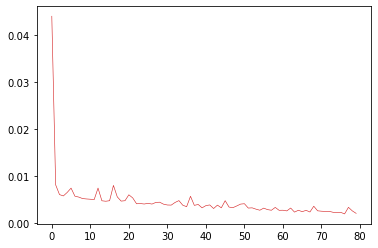

In [29]:
hist = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1, callbacks=cb_list)
plt.plot(hist.history['loss'], color='tab:red', linewidth=0.6)
print(hist.history['loss'][-1])

<span style="font-size:16px;color:#DA4512">~ Plot Results</span>

(178, 20)
(178, 20, 1)
6/6 [==============================] - 1s 10ms/step - loss: 0.0029


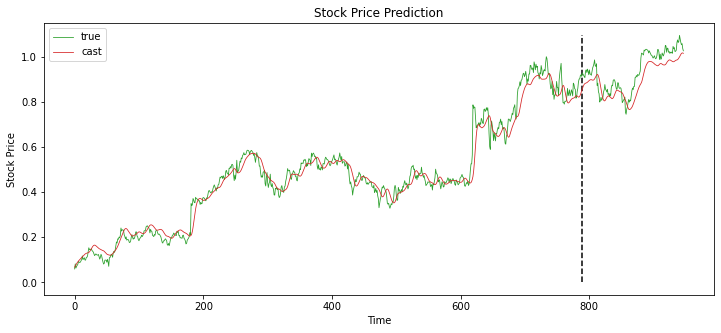

MSE: 0.001963524255773025


In [30]:
dataset_train = dfx.iloc[:tr, 1:2]
dataset_test = dfx.iloc[tr:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
inputs = scal.transform(inputs)
X_test = []
y_test = []
for i in range(timesteps, N-tr):
    X_test.append(inputs[i-timesteps:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)
model.evaluate(X_test, y_test,verbose=1)
predicted_stock_price = model.predict(X_test)[:,0]
predicted_stock_price1 = model.predict(X_train)[:,0]
#predicted_stock_price = scal.inverse_transform(predicted_stock_price)
y_g = np.hstack((y_train,y_test))
y_p = np.hstack((predicted_stock_price1,predicted_stock_price))

plt.figure(figsize=(12,5))
plt.plot(y_g, color = 'tab:green', label = 'true', linewidth=0.8)
plt.plot(y_p, color = 'tab:red', label = 'cast', linewidth=0.8)
plt.vlines(tr,0,np.max(y_g), color='black', linestyles='dashed')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

MSE = np.mean((y_g - y_p)**2)
print('MSE:', MSE)

## using PROPHET Algorithm

Importing plotly failed. Interactive plots will not work.


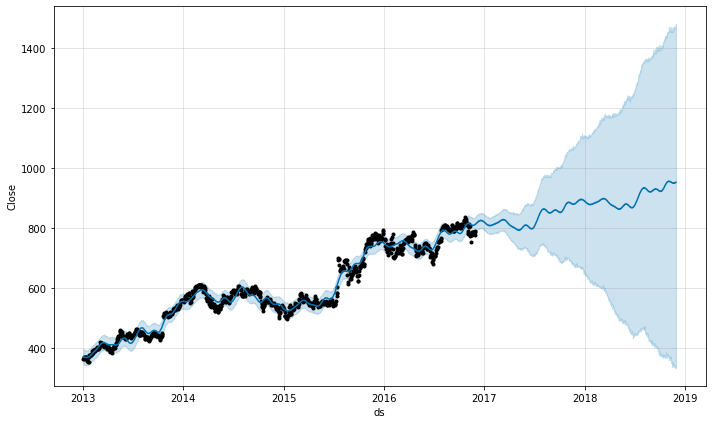

In [31]:
from prophet import Prophet
sel_pd=df.toPandas()
data = sel_pd[["Date","Close"]]
data = data.rename(columns = {"Date":"ds",'Close':"y"})
m = Prophet(daily_seasonality = True)
m.fit(data) 
future = m.make_future_dataframe(periods=365*2) 
prediction = m.predict(future)
m.plot(prediction)
plt.ylabel("Close")
plt.show()

# ~ Structured API - DataFrame & Datasets

<span style="font-size:18px;font-family:Corbel;color:#003300">

Why structed API? - DataFrames are faster than RDDs. Refer this [seminar](https://www.youtube.com/watch?v=Ofk7G3GD9jk)

Creating DataFrames: Refer [Official Documentation](https://spark.apache.org/docs/latest/api/python/getting_started/quickstart.html#DataFrame-Creation)
    
</span>

## Reading Data

In [32]:
dataset = spark.read.option('header',
                            'true' #<---- the csv has a header
                           ).csv("stocks.csv", 
                                inferSchema=True) # add infer schema to load in proper data type

print(type(dataset), dataset.count())
dataset.printSchema()
#dataset.show() # or use .describe()
print('\nSELECT')
dataset.select(['Date','Volume']).show()

print('\nFILTER & SELECT')
dataset.filter(dataset.Volume>=4000000).select(["Date","Volume","Adj Close"]).show()

<class 'pyspark.sql.dataframe.DataFrame'> 1596
root
 |-- Date: string (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Adj Close: double (nullable = true)


SELECT
+----------+---------+
|      Date|   Volume|
+----------+---------+
|2010-08-02|3713683.0|
|2010-08-03|3600995.0|
|2010-08-04|7617375.0|
|2010-08-05|4835959.0|
|2010-08-06|6632361.0|
|2010-08-09|3740656.0|
|2010-08-10|4143852.0|
|2010-08-11|4441554.0|
|2010-08-12|4404791.0|
|2010-08-13|3865531.0|
|2010-08-16|2607390.0|
|2010-08-17|3777619.0|
|2010-08-18|5367427.0|
|2010-08-19|7842150.0|
|2010-08-20|7827365.0|
|2010-08-23|5966428.0|
|2010-08-24|5519875.0|
|2010-08-25|5179016.0|
|2010-08-26|3550446.0|
|2010-08-27|4620175.0|
+----------+---------+
only showing top 20 rows


FILTER & SELECT
+----------+---------+------------------+
|      Date|   Volume|         Adj Close|
+

<span style="font-size:22px;color:#DA4512">See more @ 
* [Spark Core Documentation](https://spark.apache.org/docs/latest/api/python/reference/pyspark.html)
* [Spark SQL Documentation](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html)
</span>

# DONE!

<span style="font-size:16px;color:#DA4512">~ close spark session</span>

In [33]:
spark.stop()

stop_time = datetime.datetime.now()
elapsed_time = stop_time-start_time
print('Session Duration:', elapsed_time)

Session Duration: 0:02:04.935531


<span style="font-size:16px;color:#F0050F">~~ The End ~~</span>